### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

### Import Data

In [4]:
# main folder
path = r'C:\Users\steve\Documents\Olist Marketplace Analysis'

# data
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'project_data_w_flags.pkl'))

In [5]:
# col display settings
pd.set_option('display.max_columns', 30)

### Data Summary

In [7]:
df.head(3)

,order_id,seller_id,customer_id,product_id,product_category,price,freight_value,order_total,order_purchased_time,order_delivered_time,order_estimated_delivery_date,purchase_to_approved_hrs,delivery_time_hrs,product_description_length,product_photos_qty,review_score,customer_state,seller_state,num_orders,return_customer,num_orders_w_seller,return_to_seller,num_items,delivery_difference,on_time_flag,num_orders_received,total_revenue,unq_products_sold,revenue_flag,frequency_flag
0,b81ef226f3fe1789b1e8b2acac839d17,213b25e6f54661939f11710a6fddb871,0a8556ac6be836b46b3e89920d59291c,af74cc53dcffc8384b29e7abfa41902b,Construction,79.80,19.53,99.33,2018-04-25 22:01:49,2018-05-09 17:36:51,2018-05-22,0.22,331.58,921.0,8.0,1.0,MG,SP,1,0,1,0,1,-13.0,early,200,15989.00,81,Medium revenue,New customer
1,a9810da82917af2d9aefd1278f1dcfa0,eaf6d55068dea77334e8477d3878d89e,f2c7fc58a9de810828715166c672f10a,a630cc320a8c872f9de830cf121661a3,Auto,17.00,7.39,24.39,2018-06-26 11:01:38,2018-06-29 20:32:09,2018-07-16,0.29,81.51,1274.0,2.0,5.0,SP,SP,1,0,1,0,1,-17.0,early,3,51.00,2,Low revenue,New customer
2,25e8ea4e93396b6fa0d3dd708e76c1bd,cc419e0650a3c5ba77189a1882b7556a,25b14b69de0b6e184ae6fe2755e478f9,2028bf1b01cafb2d2b1901fca4083222,Beauty,56.99,8.72,65.71,2017-12-12 11:19:55,2017-12-18 17:24:41,2018-01-04,46.54,150.08,1536.0,2.0,5.0,SP,SP,1,0,1,0,1,-17.0,early,1893,110821.27,37,High revenue,New customer


### Data Prep for Clustering Analysis

#### 1. Choose Columns

In [10]:
df_cluster = df[['price', 'num_orders', 'num_orders_w_seller', 'num_items', 'num_orders_received', 'total_revenue', 'unq_products_sold']]

In [11]:
df_cluster.head(3)

,price,num_orders,num_orders_w_seller,num_items,num_orders_received,total_revenue,unq_products_sold
0,79.80,1,1,1,200,15989.00,81
1,17.00,1,1,1,3,51.00,2
2,56.99,1,1,1,1893,110821.27,37


In [12]:
df_cluster.shape

(118307, 7)

In [13]:
df_cluster.isnull().sum()

price                  0
num_orders             0
num_orders_w_seller    0
num_items              0
num_orders_received    0
total_revenue          0
unq_products_sold      0
dtype: int64

In [14]:
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118307 entries, 0 to 118306
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   price                118307 non-null  float64
 1   num_orders           118307 non-null  int64  
 2   num_orders_w_seller  118307 non-null  int64  
 3   num_items            118307 non-null  int64  
 4   num_orders_received  118307 non-null  int64  
 5   total_revenue        118307 non-null  float64
 6   unq_products_sold    118307 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 6.3 MB


In [15]:
df_cluster.describe().round(2)

,price,num_orders,num_orders_w_seller,num_items,num_orders_received,total_revenue,unq_products_sold
count,118307.00,118307.00,118307.00,118307.00,118307.00,118307.00,118307.00
mean,120.65,1.67,1.61,1.39,449.41,42826.04,71.26
std,184.11,2.40,2.02,1.11,595.75,58613.98,84.25
min,0.85,1.00,1.00,1.00,1.00,3.50,1.00
25%,39.90,1.00,1.00,1.00,60.00,5153.69,14.00
50%,74.90,1.00,1.00,1.00,180.00,14683.69,37.00
75%,134.90,2.00,2.00,1.00,559.00,48838.19,104.00
max,6735.00,63.00,42.00,21.00,2155.00,244627.55,399.00


#### 2. Standardize Data

In [17]:
X1 = df_cluster.iloc[:, 0:7]

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaleStandard = StandardScaler()

In [20]:
X1 = scaleStandard.fit_transform(X1)

In [21]:
df_cluster.columns

Index(['price', 'num_orders', 'num_orders_w_seller', 'num_items',
       'num_orders_received', 'total_revenue', 'unq_products_sold'],
      dtype='object')

In [22]:
X1 = pd.DataFrame(X1, columns = ['price', 'num_orders', 'num_orders_w_seller', 'num_items',
       'num_orders_received', 'total_revenue', 'unq_products_sold'])

In [23]:
X1.describe().round(2)

,price,num_orders,num_orders_w_seller,num_items,num_orders_received,total_revenue,unq_products_sold
count,118307.00,118307.00,118307.00,118307.00,118307.00,118307.00,118307.00
mean,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.65,-0.28,-0.30,-0.35,-0.75,-0.73,-0.83
25%,-0.44,-0.28,-0.30,-0.35,-0.65,-0.64,-0.68
50%,-0.25,-0.28,-0.30,-0.35,-0.45,-0.48,-0.41
75%,0.08,0.14,0.20,-0.35,0.18,0.10,0.39
max,35.93,25.57,20.03,17.66,2.86,3.44,3.89


#### 4. Elbow Technique

In [25]:
num_cl = range(1, 10) # define range of potential clusters in data
kmeans = [KMeans(n_clusters=i) for i in num_cl] # store kmeans using defined range

In [26]:
# create score to represent a rate of variation for the given cluster option
score = [kmeans[i].fit(X1).score(X1) for i in range(len(kmeans))] 

Text(0.5, 1.0, 'Elbow Curve')

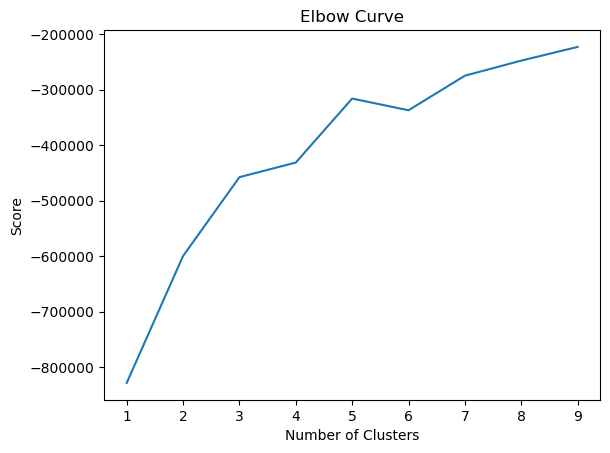

In [27]:
# plot the elbow curve using PyLab
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')

**Number of Clusters**: Will use **5** clusters.

#### 5. K-Means Clustering

In [30]:
# create the k-means object
kmeans = KMeans(n_clusters = 5)

In [31]:
# fit the k-means object to the data
kmeans.fit(X1)

KMeans(n_clusters=5)

In [32]:
X1['clusters'] = kmeans.fit_predict(X1)

In [33]:
X1.head(3)

,price,num_orders,num_orders_w_seller,num_items,num_orders_received,total_revenue,unq_products_sold,clusters
0,-0.221869,-0.279695,-0.300949,-0.354018,-0.418653,-0.457863,0.115563,1
1,-0.562968,-0.279695,-0.300949,-0.354018,-0.749328,-0.729778,-0.822092,1
2,-0.345762,-0.279695,-0.300949,-0.354018,2.423137,1.160056,-0.406675,0


In [34]:
X1['clusters'].value_counts()

clusters
1    83948
0    22151
3     8779
4     2902
2      527
Name: count, dtype: int64

Plot **Number Unique Products Sold** - vs - **Total Revenue**

Text(0, 0.5, 'Unique Products Sold')

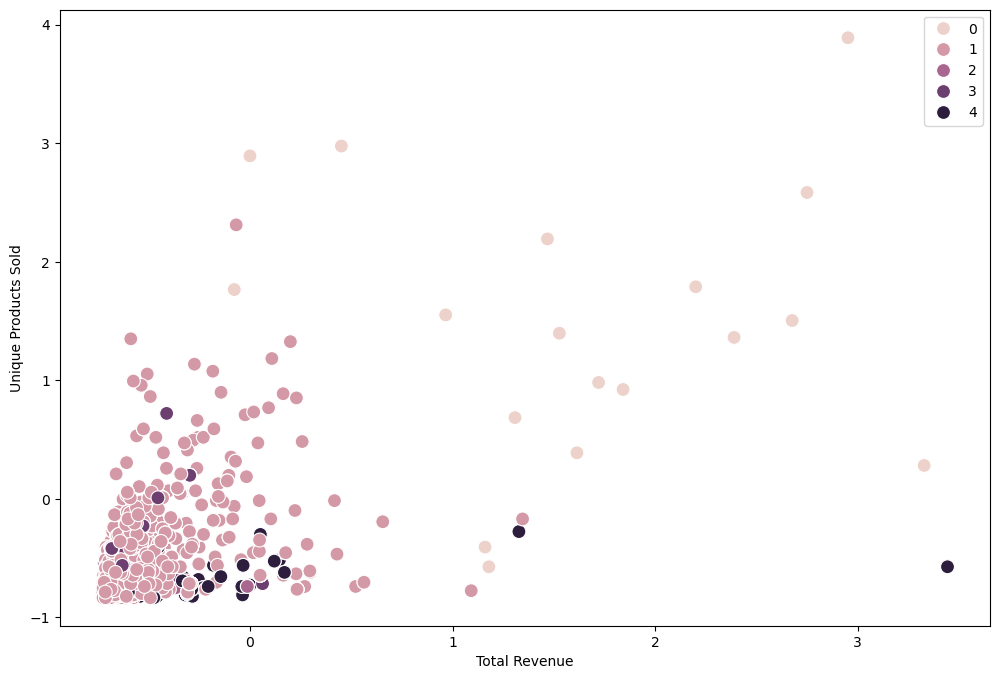

In [115]:
# plot the clusters
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=X1['total_revenue'], y=X1['unq_products_sold'], hue =kmeans.labels_, s=100)

ax.grid(False)
plt.xlabel('Total Revenue')
plt.ylabel('Unique Products Sold')

**Graph Observations:** Majority of points belong to the pink cluster (cluster 1) and are concentrated in the bottom left of the graph, with fewer unique products sold and lower revenue. All outlier points - far from the concentration - belong to the beige cluster (0). There are a few of the purple shaded clusters (2 - 4) within in the concentrated area and along the bottom where sellers will lower unique products are represented.

In [38]:
X1.loc[X1['clusters'] == 0, 'cluster'] = 'beige'
X1.loc[X1['clusters'] == 1, 'cluster'] = 'pink'
X1.loc[X1['clusters'] == 2, 'cluster'] = 'light purple'
X1.loc[X1['clusters'] == 3, 'cluster'] = 'purple'
X1.loc[X1['clusters'] == 4, 'cluster'] = 'dark purple'

In [39]:
X1.columns

Index(['price', 'num_orders', 'num_orders_w_seller', 'num_items',
       'num_orders_received', 'total_revenue', 'unq_products_sold', 'clusters',
       'cluster'],
      dtype='object')

In [40]:
X1.groupby('cluster').agg({'price':['mean', 'median'], 
                         'num_orders':['mean', 'median'], 
                         'num_orders_w_seller':['mean', 'median'],
                          'num_items':['mean', 'median'],
                          'num_orders_received':['mean', 'median'],
                          'total_revenue':['mean', 'median'],
                          'unq_products_sold':['mean', 'median'],})

price           num_orders           num_orders_w_seller  \
                  mean    median       mean    median                mean   
cluster                                                                     
beige        -0.098248 -0.231646  -0.108747 -0.279695           -0.109849   
dark purple   4.716732  3.689361  -0.182582 -0.279695           -0.190203   
light purple -0.123540 -0.281073  10.763709  9.308922           10.838051   
pink         -0.112160 -0.260161  -0.182409 -0.279695           -0.199125   
purple       -0.231341 -0.383782   1.432862  0.970994            1.593540   

                       num_items           num_orders_received            \
                median      mean    median                mean    median   
cluster                                                                    
beige        -0.300949 -0.120577 -0.354018            1.778150  1.724859   
dark purple  -0.300949 -0.262768 -0.354018           -0.530703 -0.653651   
light purple  9.618370  4.106780  0.546687           -0.015711 -0.484117   
pink         -0.300949 -0.221811 -0.354018           -0.426140 -0.544545   
purple        1.186949  2.265609  2.348098           -0.235312 -0.526081   

             total_revenue           unq_products_sold            
                      mean    median              mean    median  
cluster                                                           
beige             1.694902  1.613597          1.367198  1.504243  
dark purple       0.182366 -0.284251         -0.415845 -0.644057  
light purple     -0.025313 -0.476659         -0.009771 -0.501628  
pink             -0.425727 -0.560034         -0.322233 -0.525366  
purple           -0.264355 -0.574084         -0.230332 -0.549104

Text(0, 0.5, 'Product Price')

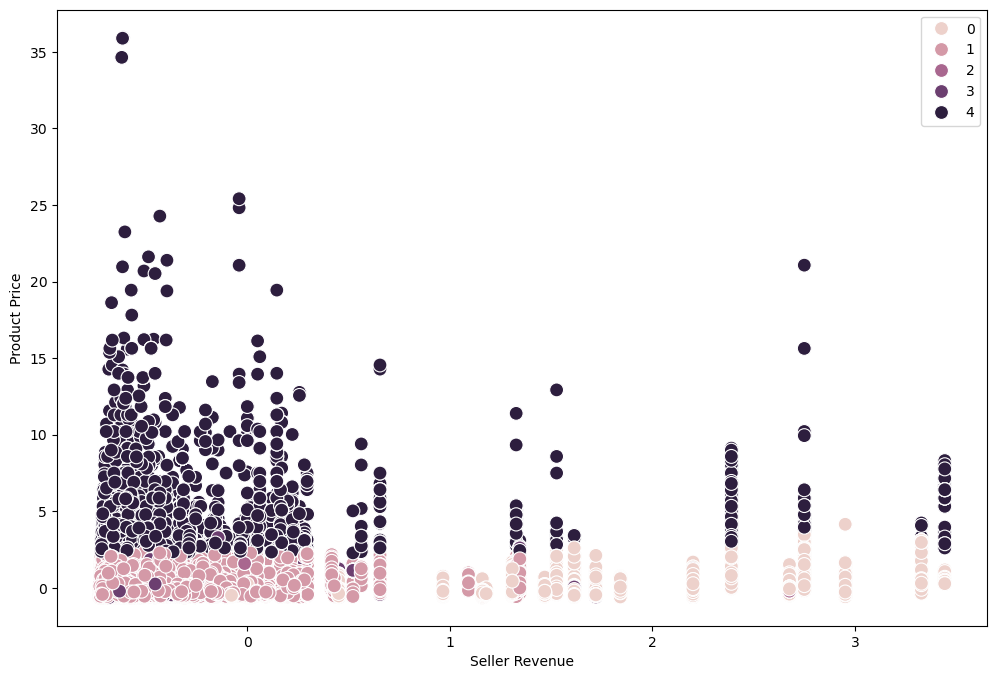

In [41]:
# plot the clusters
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=X1['total_revenue'], y=X1['price'], hue =kmeans.labels_, s=100)

ax.grid(False)
plt.xlabel('Seller Revenue')
plt.ylabel('Product Price')

In [42]:
X1['price'].mean(), X1['price'].median(), X1['price'].max()

(-9.909772997406453e-17, -0.2484835694836248, 35.925918411519405)

**Graph Observations:** The graph is mainly split by dark purple on the top with a farily distinct line separating it from the pink and beige on the bottom of the graph. There is pink on left (with some scattered purples) and beige the right. With this distinct separation, it can be understood that dark purple represent higher priced products with pink being lower priced/lower revenue and beige being lower priced/higher revenue. 

With dark purple seen across the width of the graph, this suggests that selling higher priced products does not guarantee higher revenue.

Text(0, 0.5, 'Number of Orders (per Seller)')

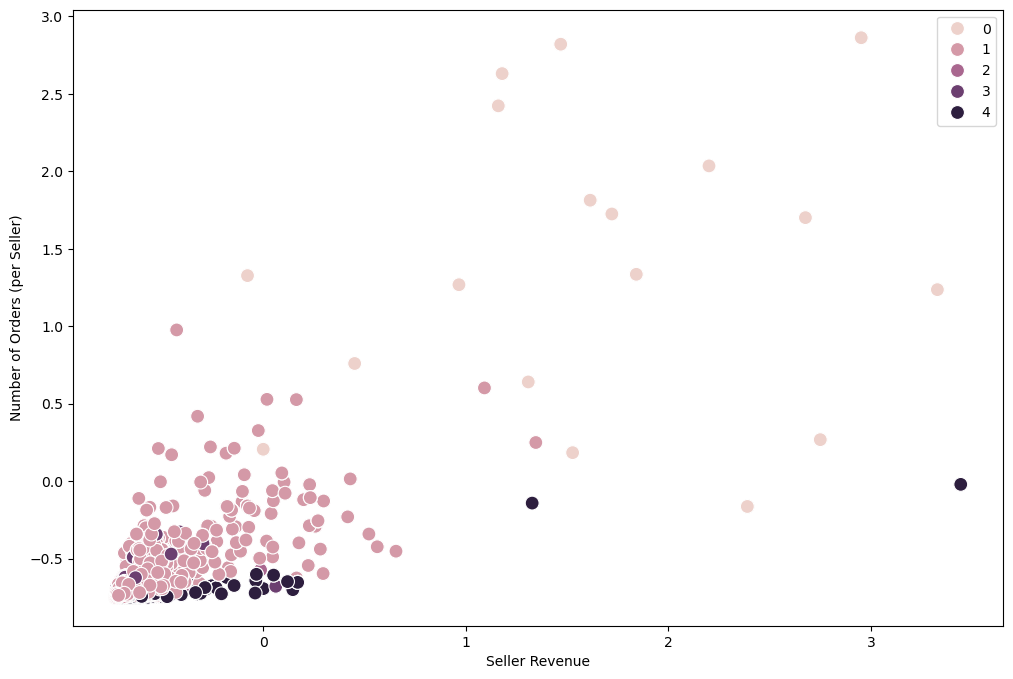

In [44]:
# plot the clusters
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=X1['total_revenue'], y=X1['num_orders_received'], hue =kmeans.labels_, s=100)

ax.grid(False)
plt.xlabel('Seller Revenue')
plt.ylabel('Number of Orders (per Seller)')

**Graph Observations:** With beige on the outskirts of the data again in this graph, this suports the assumption that beige represents outliers. Pink, which had been shown to represent the majority, has higher number of orders received, then the dark purple (higher priced products). Thus, lower priced products receive more orders than higher priced products. While lower orders does effect revenue, it is not a consistent nor determining factor for lower revenue, as seen by the dark purple points towards the right of the graph.

Text(0, 0.5, 'Customer Orders (per Seller)')

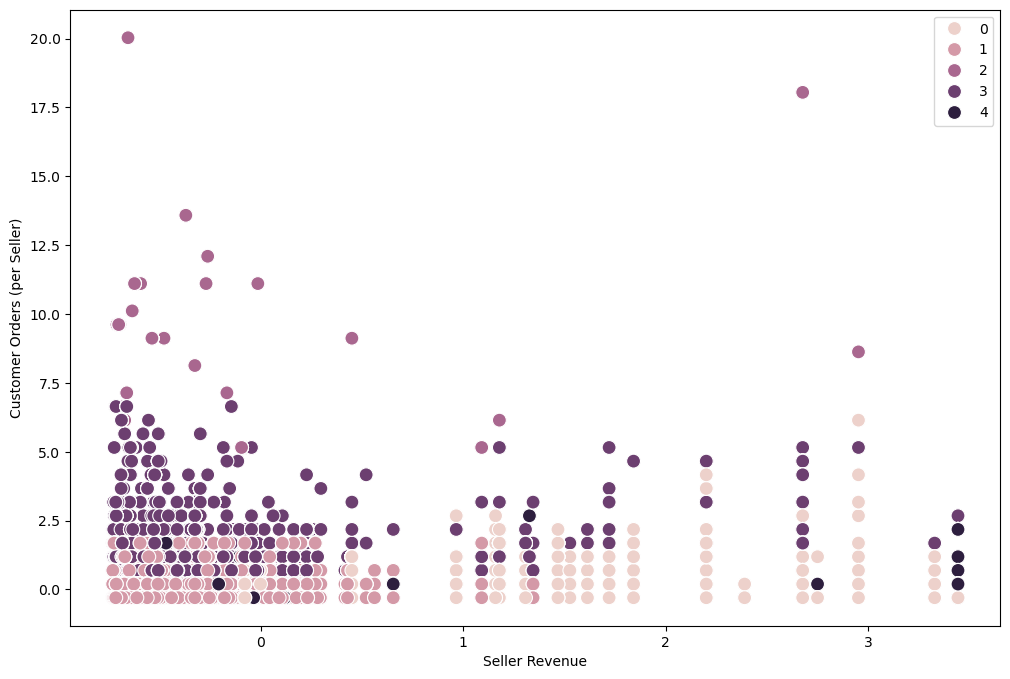

In [45]:
# plot the clusters
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=X1['total_revenue'], y=X1['num_orders_w_seller'], hue =kmeans.labels_, s=100)

ax.grid(False)
plt.xlabel('Seller Revenue')
plt.ylabel('Number of Repeat Orders Per Customer')

**Graph Observations:** Again, we see the split between pink and beige on the lower portion of the graph. We can now see that light purple and purple represent degrees of return customers (to a previously bought from seller).

Text(0, 0.5, 'Number of Items (per Order)')

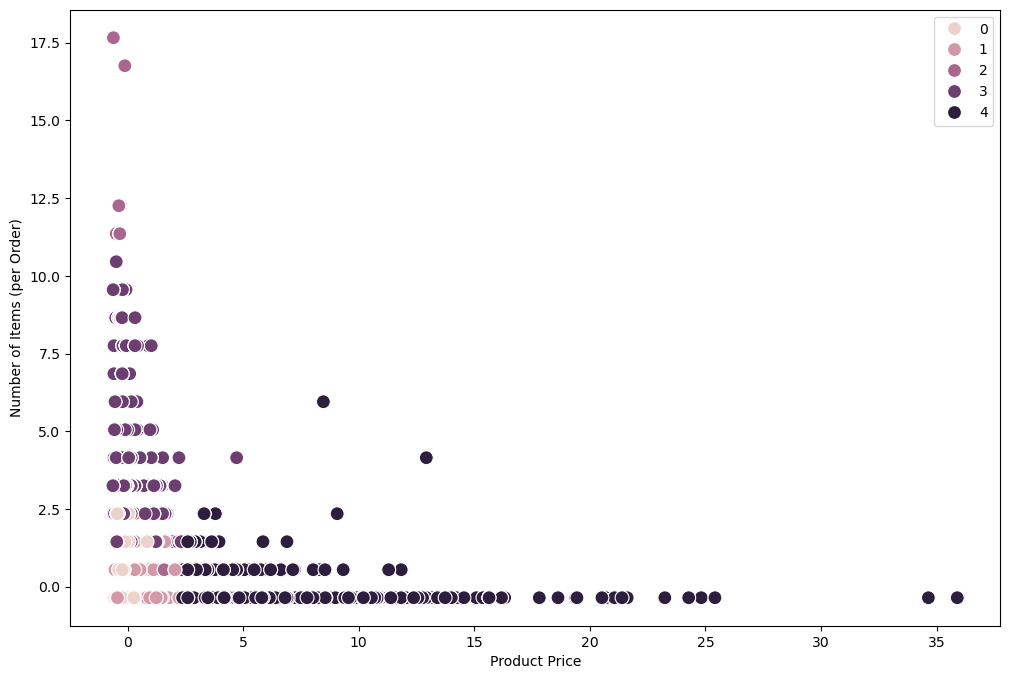

In [47]:
# plot the clusters
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=X1['price'], y=X1['num_items'], hue =kmeans.labels_, s=100)

ax.grid(False)
plt.xlabel('Product Price')
plt.ylabel('Number of Items (per Order)')

**Graph Observations:** 
- Returning customers (light purple and purple) tend to have a higher number of items per order.
- High priced products (dark purple), are generally bought alone or with very few other items in the order.

Text(0, 0.5, 'Number of Orders Placed (by Customer)')

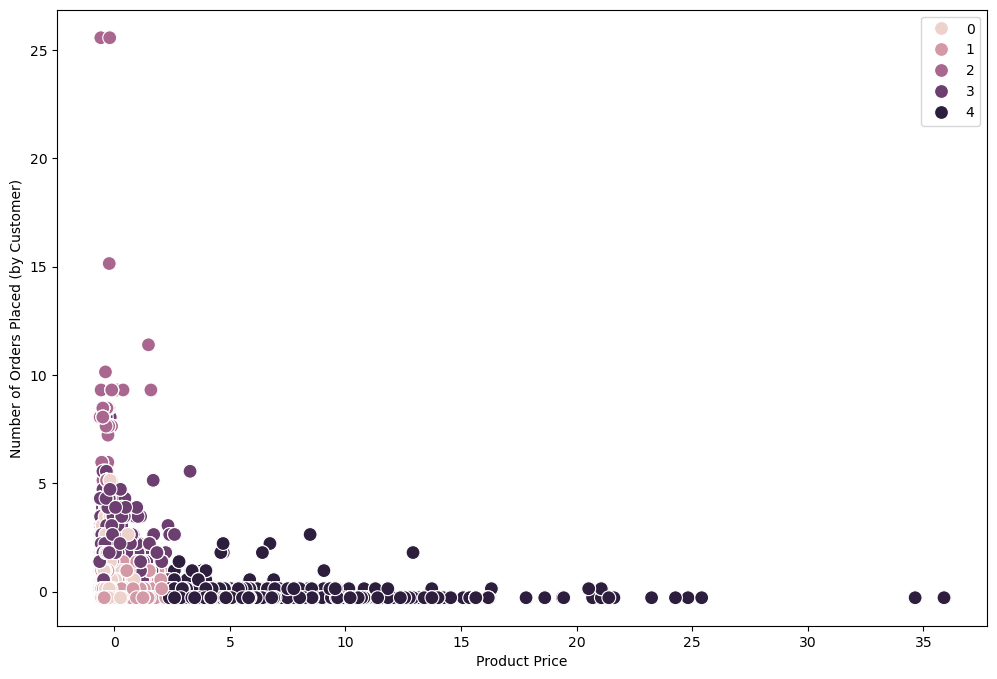

In [48]:
# plot the clusters
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=X1['price'], y=X1['num_orders'], hue =kmeans.labels_, s=100)

ax.grid(False)
plt.xlabel('Product Price')
plt.ylabel('Number of Orders Placed (by Customer)')

**Graph Observations:** Returning customers tend to buy less expensive products.

**Cluster Groupings:**  
**Pink**: Majority of Data - represent the majority behavior of data  
**Beige**: Outliers - particularly with seller driven data  
**Purples**: Nuances with customer ordering behavior - dark represents outliers with customer driven data

In [50]:
df.groupby('return_customer')['price'].mean()

return_customer
0    130.378241
1     95.025235
Name: price, dtype: float64

---  
**Conclusions:**
Within these first few years, Olist is acquiring a fair amount of new customers. New customers buy within the full price range - anywhere from inexpensive to luxury prices, but only buy 1 item in their order. 

While they are acquiring new customers, customers are not returning at a high rate, with only 28% purchasing more than once over 2 years. Return customers tend to purchase less expensive items and items with lower delivery times. A majority of the time (93%), the customer returns to a previous seller for their next order.

There are a little over 3,000 sellers, a quarter (24%) of which offer (or have only sold) 1 unique product. A majority of the sellers have made less than 50 orders over the 2 year span suggesting sellers are new or their customer base is not using Olist as their main means of purchasing (seller start date is unavailable so this data could be skewed if a significant amount of sellers joined towards the end of those 2 years).

The revenue by sellers is influenced by their product's price, their number of orders, and number of products offered, with no one determining factor.

### Map 'Cluster' to df

In [101]:
# map X1's cluster column to the df dataset
df['cluster'] = X1['cluster']

In [103]:
df.head()

,order_id,seller_id,customer_id,product_id,product_category,price,freight_value,order_total,order_purchased_time,order_delivered_time,order_estimated_delivery_date,purchase_to_approved_hrs,delivery_time_hrs,product_description_length,product_photos_qty,...,customer_state,seller_state,num_orders,return_customer,num_orders_w_seller,return_to_seller,num_items,delivery_difference,on_time_flag,num_orders_received,total_revenue,unq_products_sold,revenue_flag,frequency_flag,cluster
0,b81ef226f3fe1789b1e8b2acac839d17,213b25e6f54661939f11710a6fddb871,0a8556ac6be836b46b3e89920d59291c,af74cc53dcffc8384b29e7abfa41902b,Construction,79.80,19.53,99.33,2018-04-25 22:01:49,2018-05-09 17:36:51,2018-05-22,0.22,331.58,921.0,8.0,...,MG,SP,1,0,1,0,1,-13.0,early,200,15989.00,81,Medium revenue,New customer,pink
1,a9810da82917af2d9aefd1278f1dcfa0,eaf6d55068dea77334e8477d3878d89e,f2c7fc58a9de810828715166c672f10a,a630cc320a8c872f9de830cf121661a3,Auto,17.00,7.39,24.39,2018-06-26 11:01:38,2018-06-29 20:32:09,2018-07-16,0.29,81.51,1274.0,2.0,...,SP,SP,1,0,1,0,1,-17.0,early,3,51.00,2,Low revenue,New customer,pink
2,25e8ea4e93396b6fa0d3dd708e76c1bd,cc419e0650a3c5ba77189a1882b7556a,25b14b69de0b6e184ae6fe2755e478f9,2028bf1b01cafb2d2b1901fca4083222,Beauty,56.99,8.72,65.71,2017-12-12 11:19:55,2017-12-18 17:24:41,2018-01-04,46.54,150.08,1536.0,2.0,...,SP,SP,1,0,1,0,1,-17.0,early,1893,110821.27,37,High revenue,New customer,beige
3,ba78997921bbcdc1373bb41e913ab953,da8622b14eb17ae2831f4ac5b9dab84a,7a5d8efaaa1081f800628c30d2b0728f,548e5bfe28edceab6b51fa707cc9556f,Home & Garden,89.90,17.88,107.78,2017-12-06 12:04:06,2017-12-21 01:35:51,2018-01-04,0.15,349.53,188.0,1.0,...,MG,SP,2,1,2,1,1,-14.0,early,1662,171784.57,222,High revenue,Low frequency customer,beige
4,ba78997921bbcdc1373bb41e913ab953,da8622b14eb17ae2831f4ac5b9dab84a,7a5d8efaaa1081f800628c30d2b0728f,548e5bfe28edceab6b51fa707cc9556f,Home & Garden,89.90,17.88,107.78,2017-12-06 12:04:06,2017-12-21 01:35:51,2018-01-04,0.15,349.53,188.0,1.0,...,MG,SP,2,1,2,1,1,-14.0,early,1662,171784.57,222,High revenue,Low frequency customer,beige


In [107]:
X1['cluster'].value_counts(dropna=False)

cluster
pink            83948
beige           22151
purple           8779
dark purple      2902
light purple      527
Name: count, dtype: int64

In [109]:
df['cluster'].value_counts(dropna=False)

cluster
pink            83948
beige           22151
purple           8779
dark purple      2902
light purple      527
Name: count, dtype: int64

### Export Data

In [111]:
df.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'project_data_w_flags.csv'))

In [112]:
df.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'project_data_w_cluster.csv'))